Model Selction

# 1 Score and cross-validated scores
Every estimator provides a `score` method that judge the quality of the fit(or the predication) on the new data. **Bigger** is **better**

In [1]:
from sklearn import datasets,svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

KFold cross-validation

In [8]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


# 2 Cross-validation generator

In [12]:
from sklearn.model_selection import KFold, cross_val_score
X = ['a', 'a', 'b', 'c', 'c', 'c']
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | Test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | Test: [0 1]
Train: [0 1 4 5] | Test: [2 3]
Train: [0 1 2 3] | Test: [4 5]


cross-validation can be performed easily

In [13]:
kfold = KFold(n_splits=3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) 
         for train, test in kfold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

The cross-validation score can be directly calculated using the `cross_val_score` helper.

In [14]:
cross_val_score(svc, X_digits, y_digits, cv=kfold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

Alternatively, the `scoring` arguments can be provided to specify an alternative scoring method.

In [17]:
cross_val_score(svc, X_digits, y_digits, cv=kfold, scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

## Exercise
On the digits datasets, plot the cross-validation score of svc estimator with a linear kernel as a function of parameter $c$ (using a logarithmic grid of points, from 1 to 10)

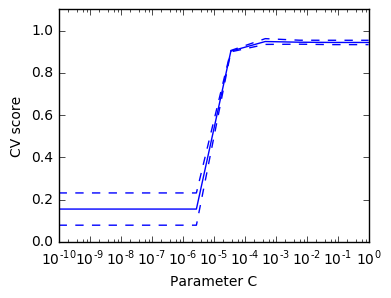

In [37]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = []
scores_std = []
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

# 3 Grid-search and cross-validated estimators
Given data, compute teh score during the fit of an estimator on a parameter grid and choose the parametes to maximize othe cross-validation scores. By default, the `GridSearchCV` use a 3-fold cross-validation.

In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn  import svm
svc = svm.SVC(kernel='linear')
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X[:1000], y[:1000])
print(clf.best_score_)
print(clf.best_estimator_.C)

0.925
0.00774263682681


In [48]:
clf.score(X[1000:],y[1000:])

0.94353826850690092